Index number : 190026T

Name         : AHAMED M.I.I

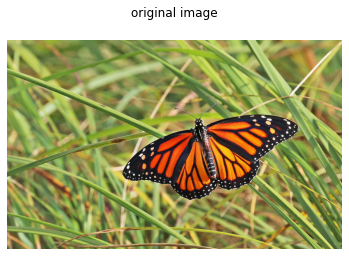

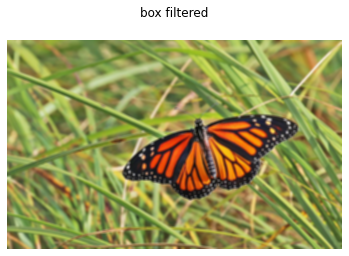

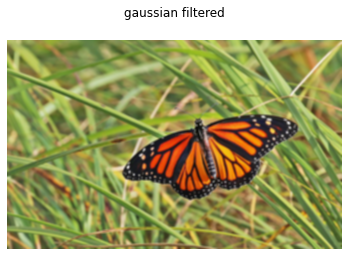

In [1]:
#1)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

butterfly = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_03\butterfly.jpg', cv.IMREAD_COLOR)
assert butterfly is not None
butterfly = cv.cvtColor(butterfly, cv.COLOR_BGR2RGB)

fig1, ax = plt.subplots()
ax.imshow(butterfly)
ax.title.set_text('original image')
ax.axis('off')
ax.xaxis.tick_top()

#box filter
kernel = np.ones((9, 9), np.float32)/81
box = cv.filter2D(butterfly, -1, kernel)
fig2, ax = plt.subplots()
ax.imshow(box)
ax.title.set_text('box filtered')
ax.axis('off')
ax.xaxis.tick_top()

#gaussian filter
sigma = 4
gauss = cv.GaussianBlur(butterfly, (9,9), sigma)
fig3, ax = plt.subplots()
ax.imshow(gauss)
ax.title.set_text('gaussian filtered')
ax.axis('off')
ax.xaxis.tick_top()


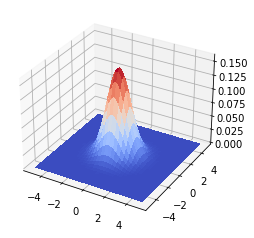

In [32]:
#2)
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

sigma = 1
res = 0.1
x = y = np.arange(-5.0, 5.0 + res, res)
X, Y = np.meshgrid(x, y)
G = np.exp(-(X**2 + Y**2)/(2*sigma**2))/(2*np.pi*sigma**2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, G, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

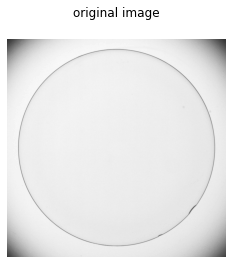

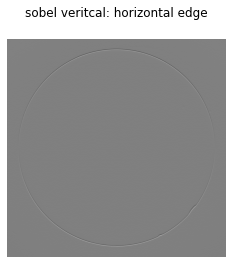

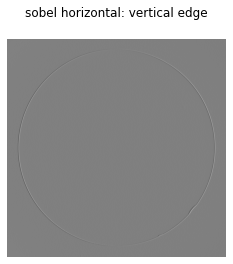

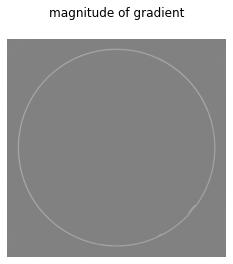

In [21]:
#3)
lense = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_03\contact_lens.tif', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert lense is not None

fig1, ax = plt.subplots()
ax.imshow(lense, cmap = 'gray', vmin =0, vmax=255)
ax.title.set_text('original image')
ax.axis('off')
ax.xaxis.tick_top()

#sobel veritcal
kernel_y = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype = np.float32)
image_y = cv.filter2D(lense, -1, kernel_y)

fig2, ax = plt.subplots()
ax.imshow(image_y, cmap = 'gray', vmin =-1020, vmax=1020)
ax.title.set_text('sobel veritcal: horizontal edge')
ax.axis('off')
ax.xaxis.tick_top()

#sobel horizontal
kernel_x = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype = np.float32)
image_x = cv.filter2D(lense, -1, kernel_x)

fig3, ax = plt.subplots()
ax.imshow(image_x, cmap = 'gray', vmin =-1020, vmax=1020)
ax.title.set_text('sobel horizontal: vertical edge')
ax.axis('off')
ax.xaxis.tick_top()

#magnitude of gradient
grad_mag = np.sqrt(image_y**2 + image_x**2)
fig, ax = plt.subplots()
ax.imshow(grad_mag, cmap = 'gray', vmin =-1020, vmax=1020)
ax.title.set_text('magnitude of gradient')
ax.axis('off')
ax.xaxis.tick_top()

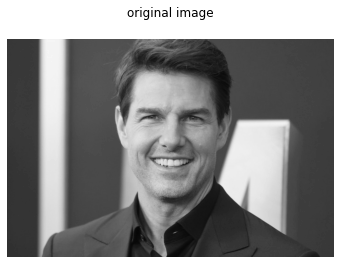

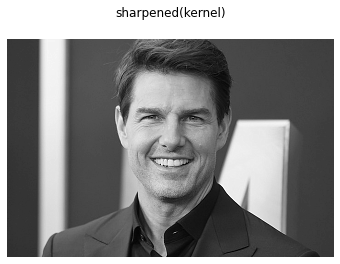

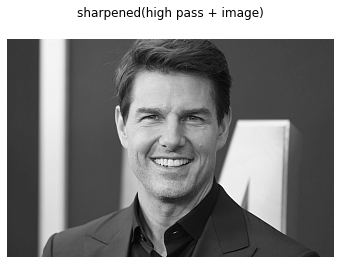

In [29]:
#4)
tom = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_03\tom.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert tom is not None

fig1, ax = plt.subplots()
ax.imshow(tom, cmap = 'gray', vmin =0, vmax=255)
ax.title.set_text('original image')
ax.axis('off')
ax.xaxis.tick_top()

#kernel sharpening
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]], np.float32)

sharpened = cv.filter2D(tom, -1, kernel) 
fig2, ax = plt.subplots()
ax.imshow(sharpened, cmap = 'gray', vmin =0, vmax=255)
ax.title.set_text('sharpened(kernel)')
ax.axis('off')
ax.xaxis.tick_top()

#(high pass + image) sharpening
sigma = 2
gauss = cv.getGaussianKernel(5, sigma)
lp = cv.sepFilter2D(tom, -1, gauss, gauss)
hp = tom - lp
sharp = cv.addWeighted(tom, 1.0, hp, 1.5, 0)

fig3, ax = plt.subplots()
ax.imshow(sharp, cmap = 'gray', vmin =0, vmax=255)
ax.title.set_text('sharpened(high pass + image)')
ax.axis('off')
ax.xaxis.tick_top()
